In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations 

import sklearn
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

from pandas.tools.plotting import parallel_coordinates  #from pandas.plotting import parallel_coordinates
#conda install -c plotly plotly
#import plotly.plotly as py
#import plotly.graph_objs as go

**We know that for KMeans clustering we need to decide the number of clusters/centroids so we take hint from the optimal no. of clusters that we got before from mean shift algorithm and try them out.**
* using different subsets of the original data
* using variations of the original segmentation attributes
* using different distance metrics
* using different segmentation methods
* using different numbers of clusters

**We don't need the 'churn' column as is was meant for supervised learning**

In [2]:
df1           = pd.read_pickle("./ds1_trans.pkl")
df2           = pd.read_pickle("./ds2_trans.pkl")
df1_churn     = pd.read_pickle("./df1_churn.pkl")
df2_churn     = pd.read_pickle("./df2_churn.pkl")
df1_not_churn = pd.read_pickle("./df1_not_churn.pkl")
df2_not_churn = pd.read_pickle("./df2_not_churn.pkl")
                           
df1           = df1.drop('churn', axis=1)
df2           = df2.drop('Churn', axis=1)
df1_churn     = df1_churn.drop('churn', axis=1)
df2_churn     = df2_churn.drop('Churn', axis=1)
df1_not_churn = df1_not_churn.drop('churn', axis=1)
df2_not_churn = df2_not_churn.drop('Churn', axis=1)

In [2]:
df1_red = pd.read_pickle("./ds1_reduced.pkl")
df2_red = pd.read_pickle("./ds2_reduced.pkl")

df1_red = df1_red.drop('churn', axis=1)
df2_red = df2_red.drop('Churn', axis=1)

**1. Main KMeans function**

In [3]:
def run_Kmeans(df, try_no_clusters, scale_df):
    dfx         = scale(df)
    col_names   = df.columns
    all_comb    = list(combinations(col_names, 2))
    color_theme = np.array(['red','green','blue','yellow','black','pink','orange','violet','brown','white'])
    clustering = KMeans(n_clusters=try_no_clusters)
    
    if(scale_df == 1):
        clustering.fit(dfx)
    elif(scale_df == 0):
        clustering.fit(df)
    print(clustering)
    
    #permutate over all colummns !!!
    for i in range(len(all_comb)):
        plt.scatter(x=df[all_comb[i][0]], y=df[all_comb[i][1]], c=color_theme[clustering.labels_],s=10)
        plt.xlabel(all_comb[i][0])
        plt.ylabel(all_comb[i][1])
        plt.show()

    return clustering

**2. Splitting the dataset according to cluster**

In [4]:
def split_datasets_into_cluster(df, cluster_labels):
    df['cluster']   = cluster_labels
    count_labels    = Counter(list(cluster_labels))
    label_no        = list(count_labels.keys())
    label_freq      = list(count_labels.values())
    print(label_no)
    print(label_freq)
    label_no.sort()
                                                
    df_cluster_list = [df[0:0] for i in range(len(label_no))]   #cluster_labels
    for i in range(len(label_no)):
        df_cluster_list[i] = df[df['cluster'] == i]
        
    return df_cluster_list, df

**3. Saving the clustered unsclled data (without un-doing data transformation) for further analysis**

In [5]:
                                        # df____.to_pickle("./Clustering_results_for_further_analysis_and_profiling/df____.pkl")
def save_split_cluster(clustering_result,dataset):
    t = time.time()
    for i in range(len(clustering_result)):
        b = './Clustering_results_for_further_analysis_and_profiling/'
        s = 'KMeans_'+str(dataset)+'_'+str(t)+'__C_'+str(i)
        clustering_result[i].to_pickle(b+s+'.pkl')
    return

## Dataset - 1 (both churn and non-churn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


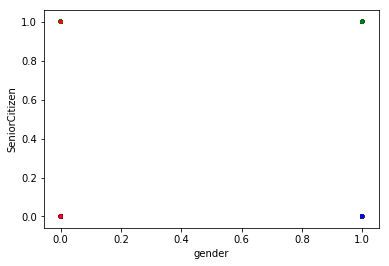

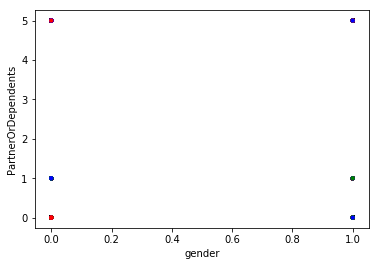

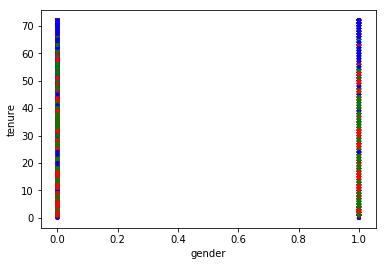

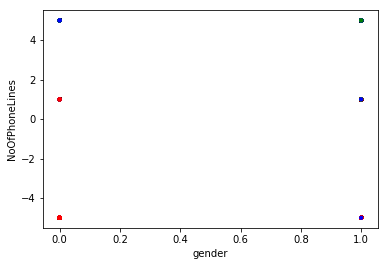

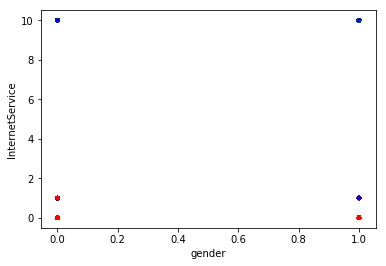

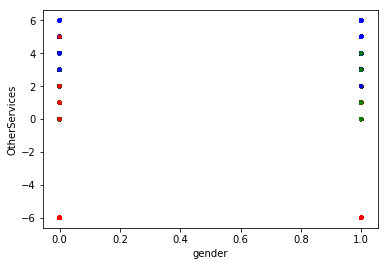

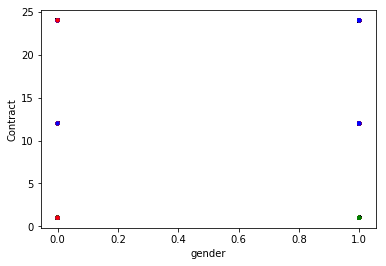

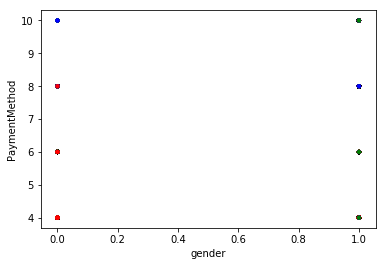

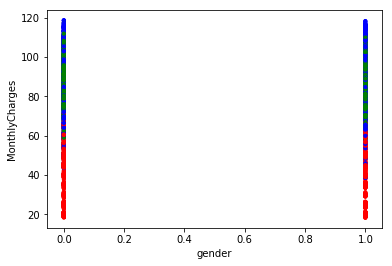

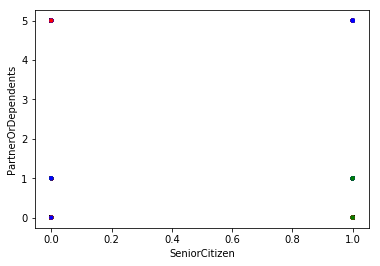

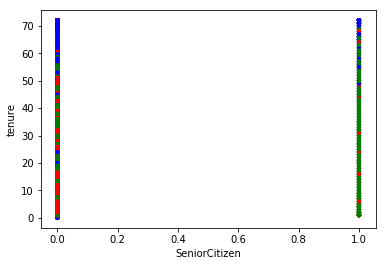

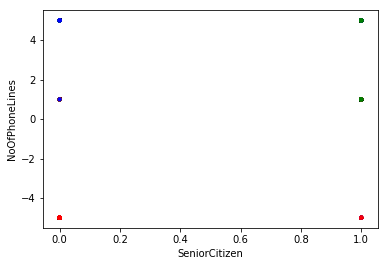

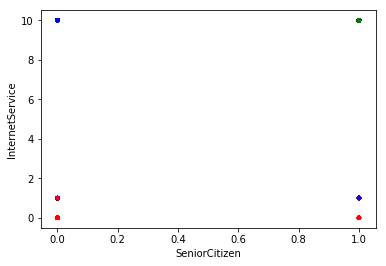

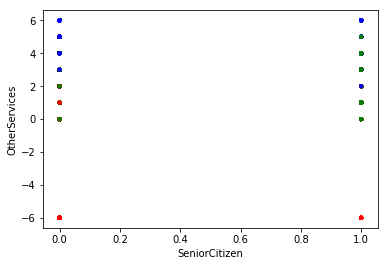

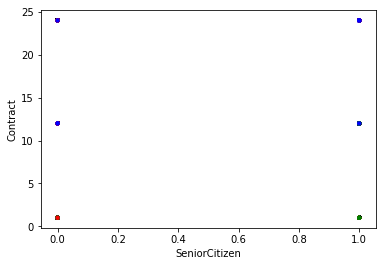

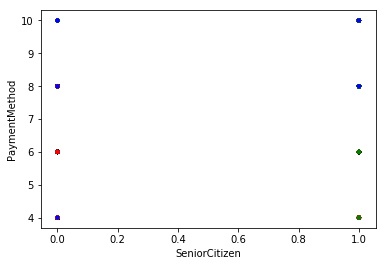

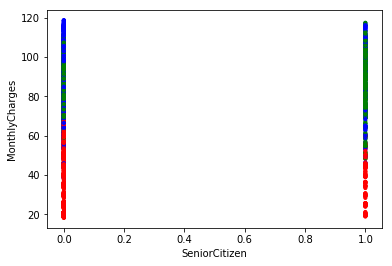

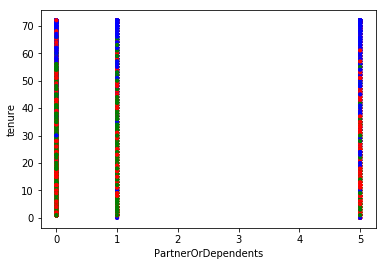

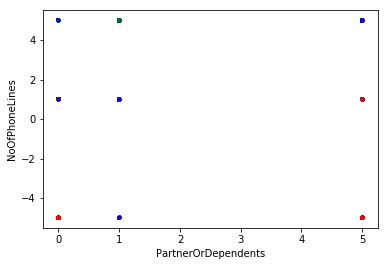

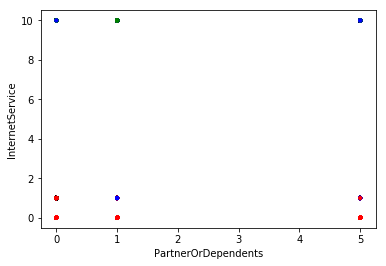

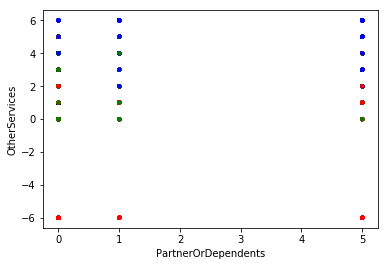

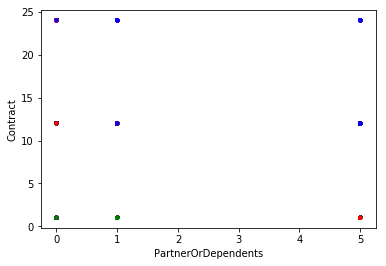

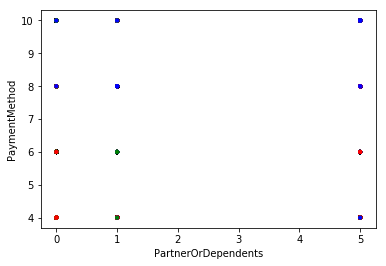

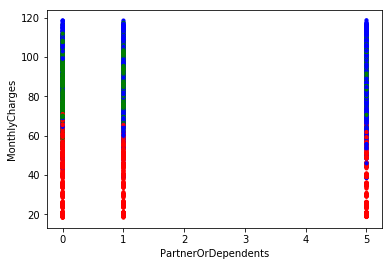

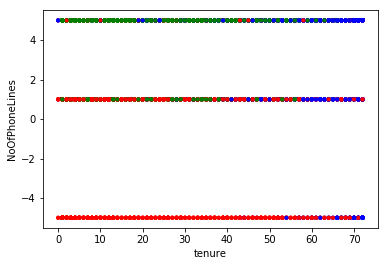

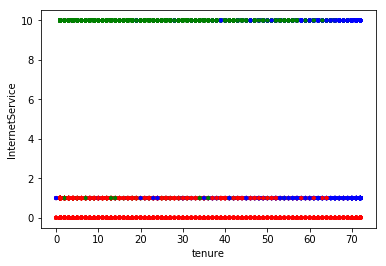

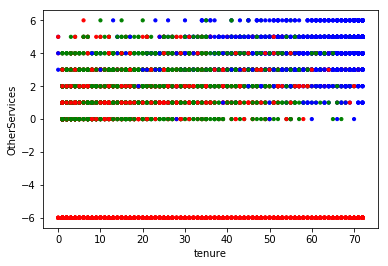

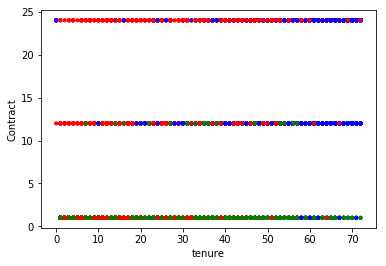

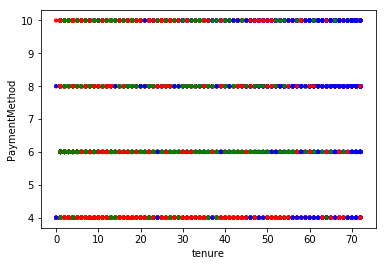

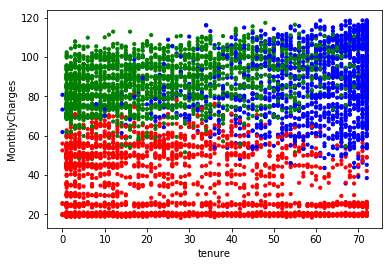

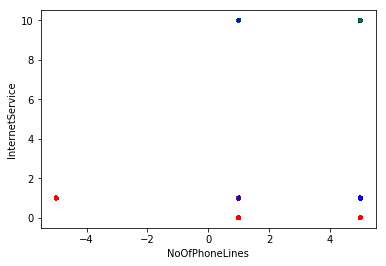

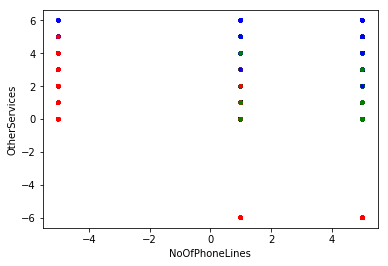

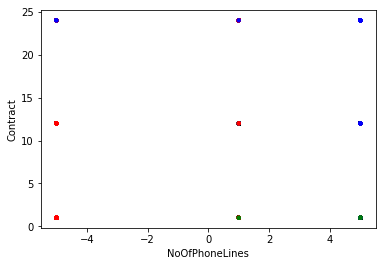

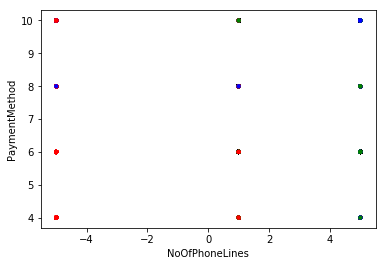

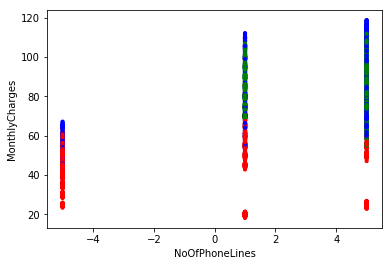

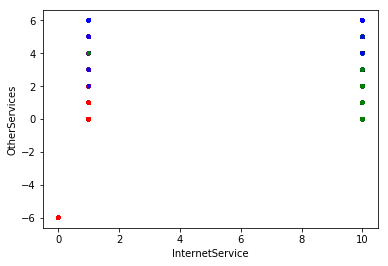

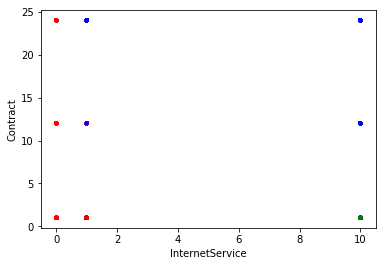

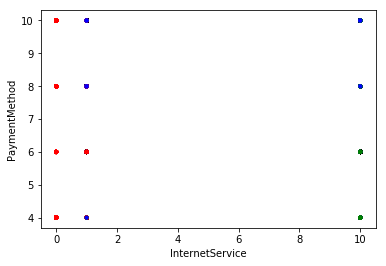

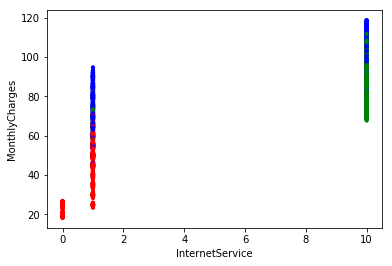

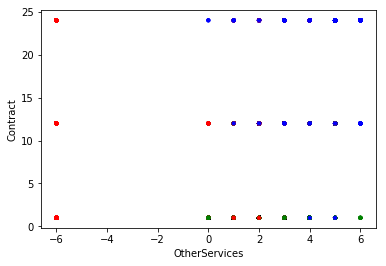

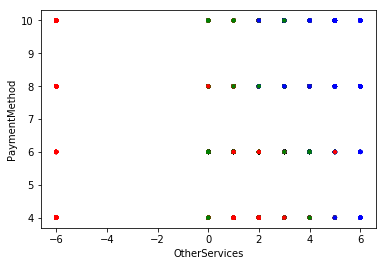

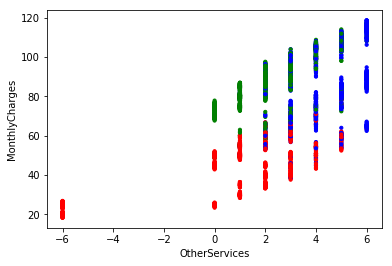

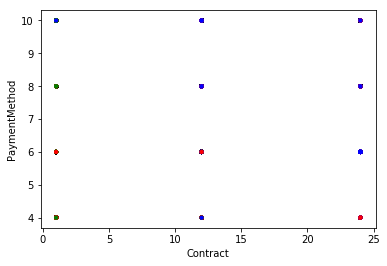

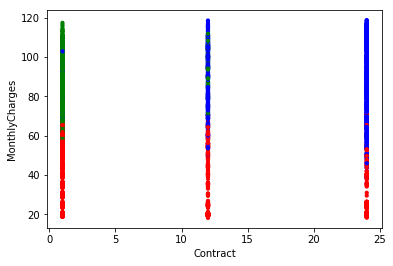

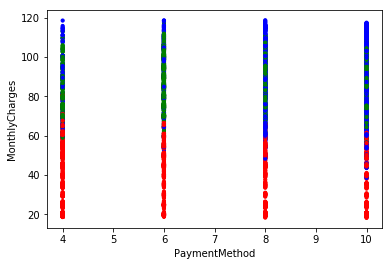

[0 0 0 ..., 0 1 2]


In [6]:
df1_5_clusters = run_Kmeans(df2_red,3,1)
print(df1_5_clusters.labels_)

In [8]:
clustering_result, clustered_df = split_datasets_into_cluster(df2_red, df1_5_clusters.labels_)
#clustering_result[2]

[0, 1, 2]
[2906, 2409, 1706]


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


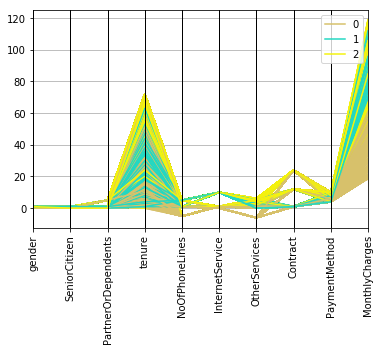

In [9]:
feature_names       = clustered_df.columns[:-1]
plot_data           = pd.concat([clustered_df[feature_names], clustered_df['cluster']],axis=1)
parallel_coordinates(plot_data, 'cluster')
plt.xticks(rotation=90)
plt.show()

In [9]:
clustered_df.describe() 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,cluster
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,48.538254,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,1.795680
std,29.473116,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,1.280318
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1.000000
50%,48.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,2.000000
75%,74.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,3.000000
max,100.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,4.000000


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


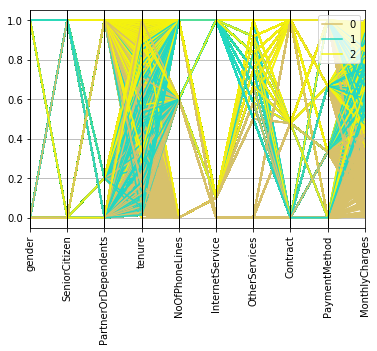

In [10]:
normalized_df = (clustered_df.iloc[:,:-1]-clustered_df.iloc[:,:-1].min())/(clustered_df.iloc[:,:-1].max()-clustered_df.iloc[:,:-1].min())
normalized_df['cluster'] = clustered_df['cluster']
plot_data           = pd.concat([normalized_df[feature_names], normalized_df['cluster']],axis=1)
parallel_coordinates(plot_data, 'cluster')
plt.xticks(rotation=90)
plt.show()

**So clearly we need to selectively scale columns before plotting**<br/>
But if we do that while profiling not only do we have to undo data-transformation but also the data scalling

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


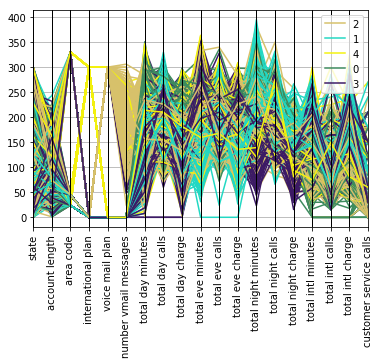

In [15]:
plot_df = clustered_df.copy()
plot_df['state']                  = clustered_df['state']*3
plot_df['area code']              = (clustered_df['area code']-400)*3
plot_df['international plan']     = plot_df['international plan']*300
plot_df['voice mail plan']        = plot_df['voice mail plan']*300
plot_df['number vmail messages']  = plot_df['number vmail messages']*6
plot_df['total day calls']        = plot_df['total day calls']*2
plot_df['total day charge']       = plot_df['total day charge']*5
plot_df['total eve calls']        = plot_df['total eve calls']*2
plot_df['total eve charge']       = plot_df['total eve charge']*10
plot_df['total night calls']      = plot_df['total night calls']*2
plot_df['total night charge']     = plot_df['total night charge']*15
plot_df['total intl minutes']     = plot_df['total intl minutes']*15
plot_df['total intl calls']       = plot_df['total intl calls']*15
plot_df['total intl charge']      = plot_df['total intl charge']*60
plot_df['customer service calls'] = plot_df['customer service calls']*30
plot_data           = pd.concat([plot_df[feature_names], plot_df['cluster']],axis=1)
parallel_coordinates(plot_data, 'cluster')
plt.xticks(rotation=90)
plt.show()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


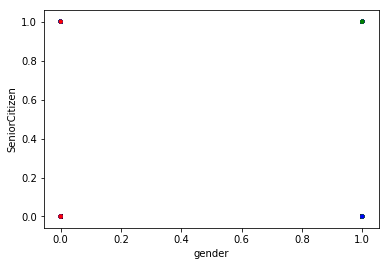

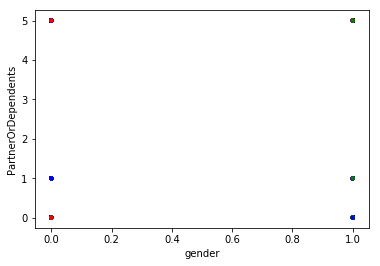

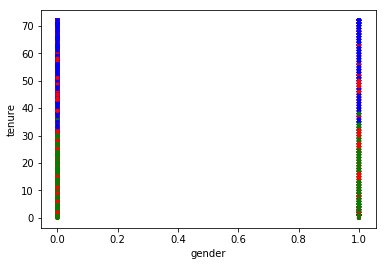

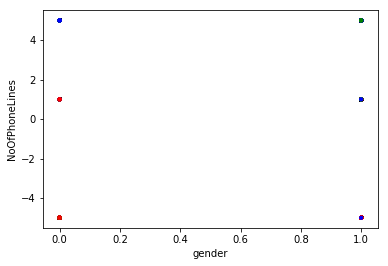

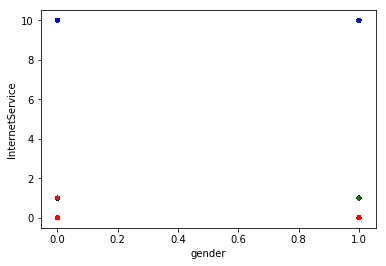

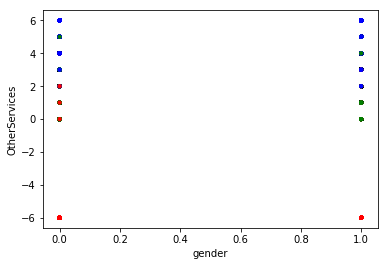

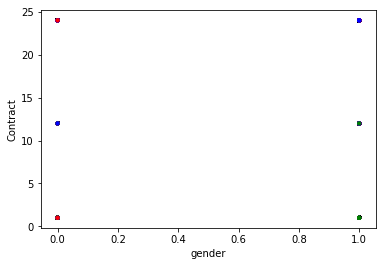

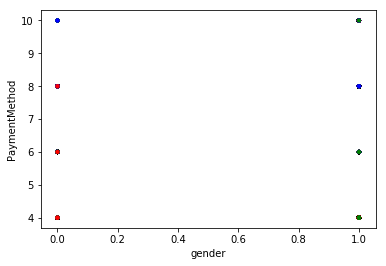

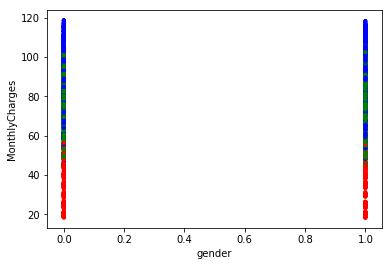

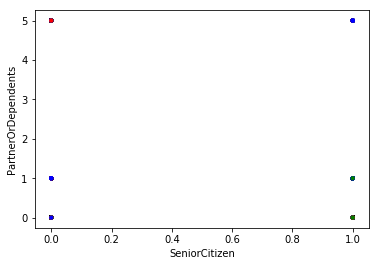

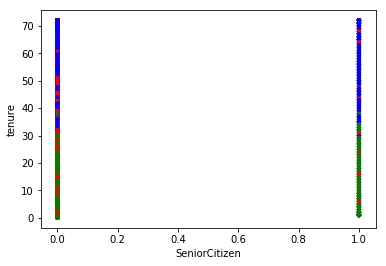

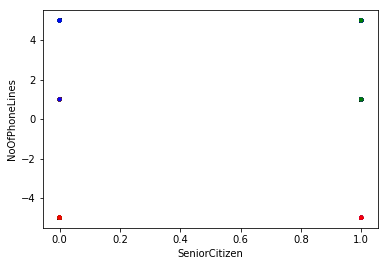

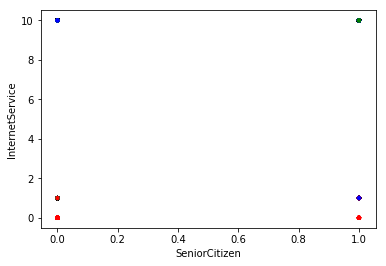

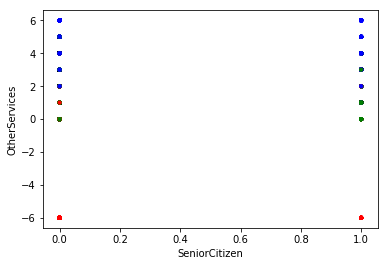

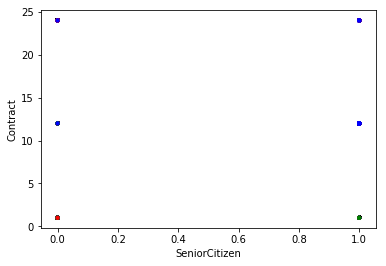

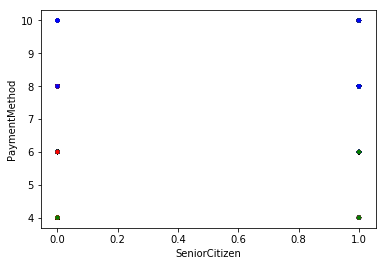

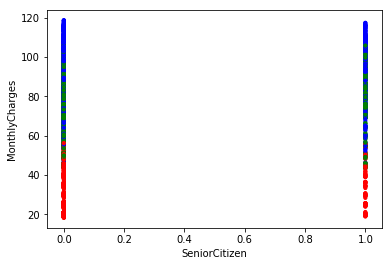

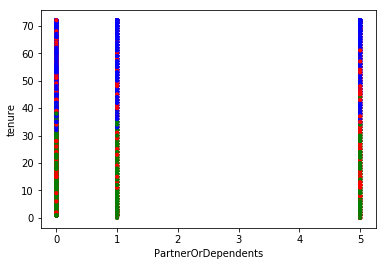

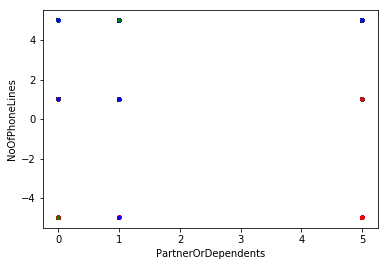

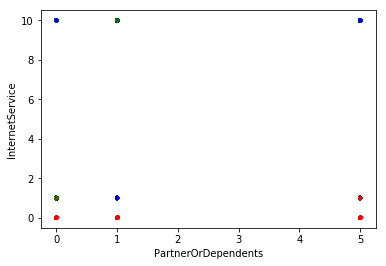

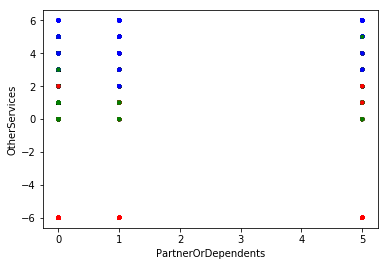

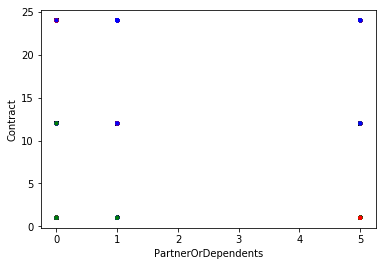

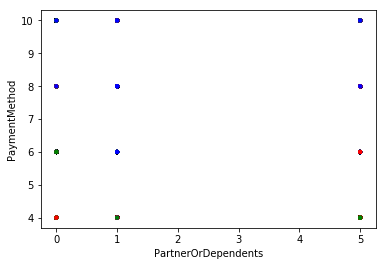

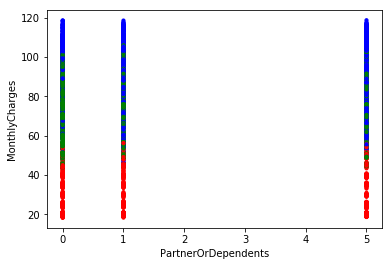

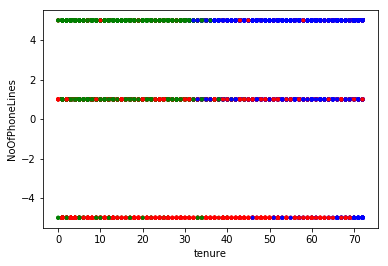

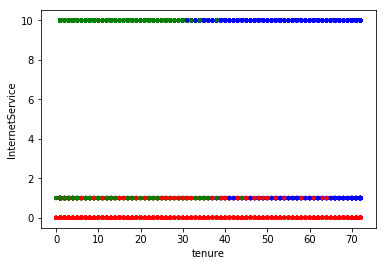

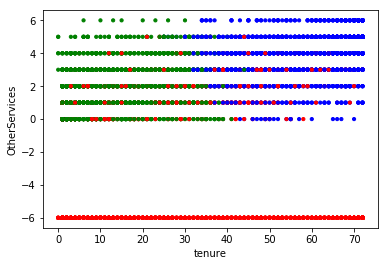

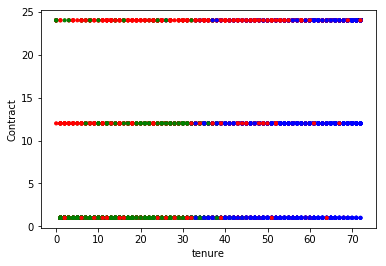

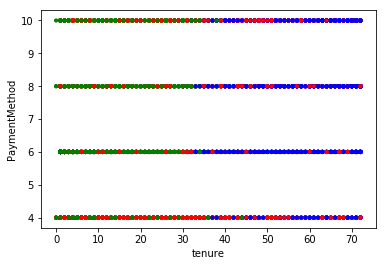

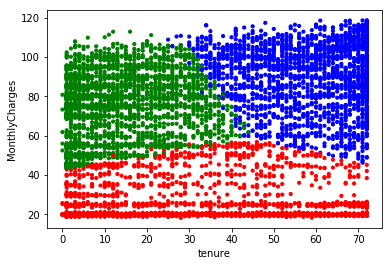

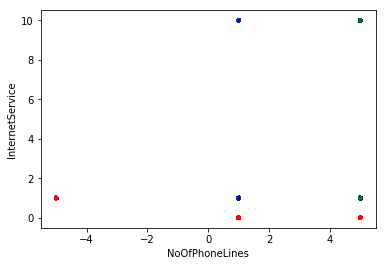

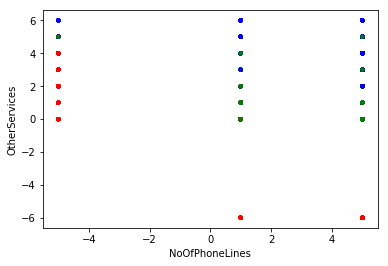

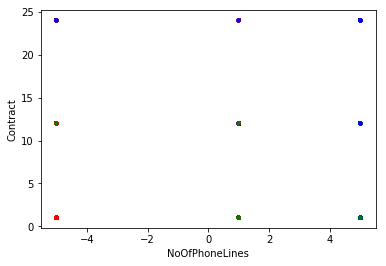

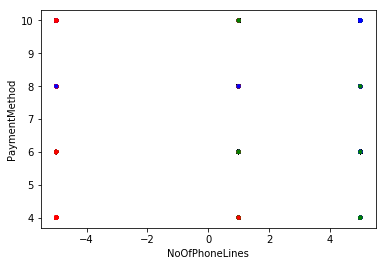

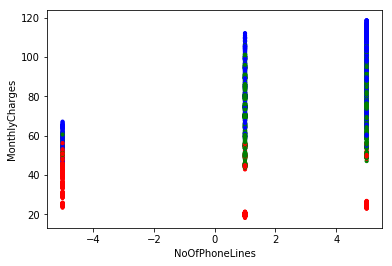

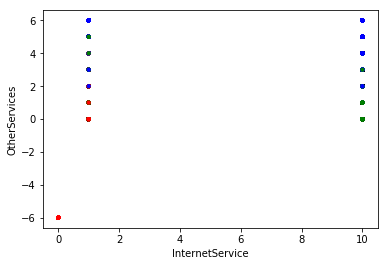

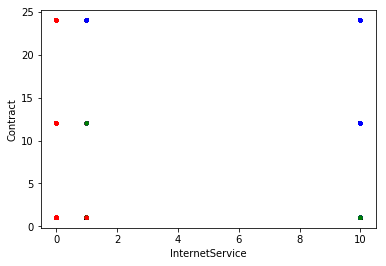

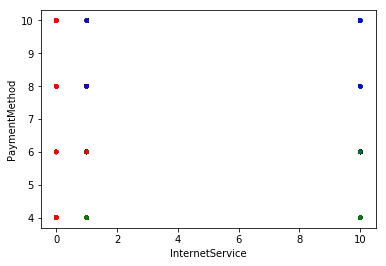

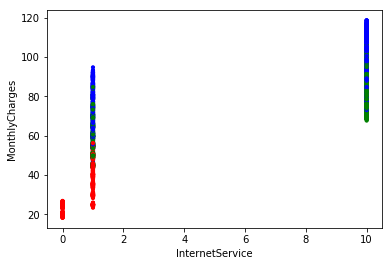

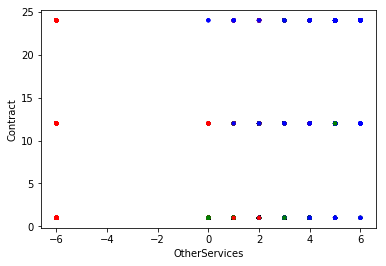

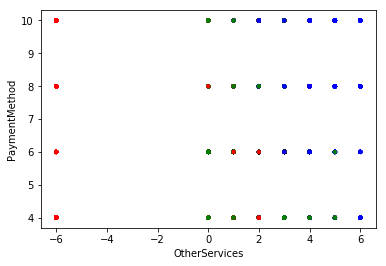

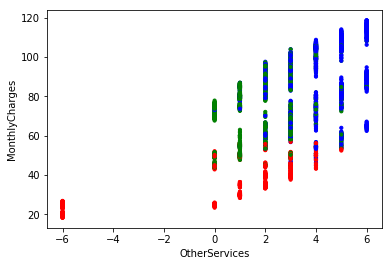

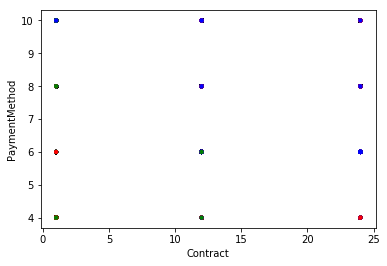

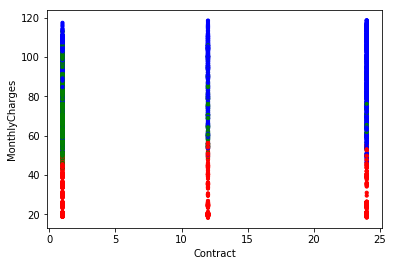

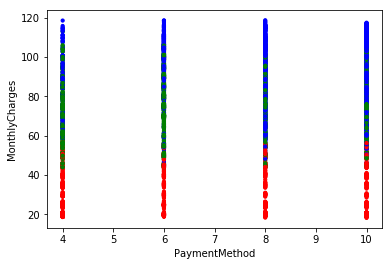

In [7]:
df2_red_3_clusters = run_Kmeans(df2_red,3,0)

[0, 1, 2]
[2171, 2649, 2201]


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  """


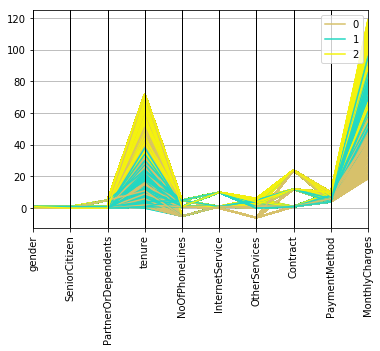

In [8]:
clustering_result, clustered_df = split_datasets_into_cluster(df2_red, df2_red_3_clusters.labels_)

feature_names       = clustered_df.columns[:-1]
plot_data           = pd.concat([clustered_df[feature_names], clustered_df['cluster']],axis=1)
parallel_coordinates(plot_data, 'cluster')
plt.xticks(rotation=90)
plt.show()

In [17]:
clustering_result[0].describe()

,gender,SeniorCitizen,PartnerOrDependents,tenure,NoOfPhoneLines,InternetService,OtherServices,Contract,PaymentMethod,MonthlyCharges,cluster
count,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.0
mean,0.497069,0.114302,2.426729,59.450762,3.334115,5.558030,4.133646,18.219812,8.119578,87.702198,0.0
std,0.500138,0.318272,2.194814,13.297727,2.702617,4.500945,1.280929,7.117801,1.859525,17.865793,0.0
min,0.000000,0.000000,0.000000,0.000000,-5.000000,1.000000,0.000000,1.000000,4.000000,35.700000,0.0
25%,0.000000,0.000000,1.000000,52.000000,1.000000,1.000000,3.000000,12.000000,6.000000,74.125000,0.0
50%,0.000000,0.000000,1.000000,64.000000,5.000000,10.000000,4.000000,24.000000,8.000000,88.900000,0.0
75%,1.000000,0.000000,5.000000,70.000000,5.000000,10.000000,5.000000,24.000000,10.000000,104.050000,0.0
max,1.000000,1.000000,5.000000,72.000000,5.000000,10.000000,6.000000,24.000000,10.000000,118.750000,0.0


In [18]:
clustering_result[1].describe()

,gender,SeniorCitizen,PartnerOrDependents,tenure,NoOfPhoneLines,InternetService,OtherServices,Contract,PaymentMethod,MonthlyCharges,cluster
count,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.000000,2409.0
mean,0.496887,0.319220,0.819012,21.709423,3.294728,9.316314,2.037360,1.826484,6.623495,85.920154,1.0
std,0.500094,0.466271,1.485966,18.299722,1.978575,2.384976,1.414601,2.900300,1.663002,12.352177,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,48.200000,1.0
25%,0.000000,0.000000,0.000000,5.000000,1.000000,10.000000,1.000000,1.000000,6.000000,75.500000,1.0
50%,0.000000,0.000000,0.000000,17.000000,5.000000,10.000000,2.000000,1.000000,6.000000,85.400000,1.0
75%,1.000000,1.000000,1.000000,34.000000,5.000000,10.000000,3.000000,1.000000,8.000000,95.250000,1.0
max,1.000000,1.000000,5.000000,72.000000,5.000000,10.000000,6.000000,12.000000,10.000000,117.450000,1.0


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


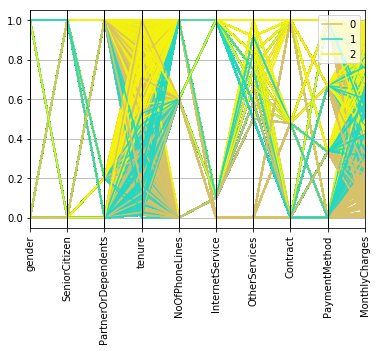

In [10]:
normalized_df = (clustered_df.iloc[:,:-1]-clustered_df.iloc[:,:-1].min())/(clustered_df.iloc[:,:-1].max()-clustered_df.iloc[:,:-1].min())
normalized_df['cluster'] = clustered_df['cluster']
plot_data           = pd.concat([normalized_df[feature_names], normalized_df['cluster']],axis=1)
parallel_coordinates(plot_data, 'cluster')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_verify = pd.read_pickle('./Clustering_results_for_further_analysis_and_profiling/'+'KMeans__1554568360.67937__C_4.pkl')
df_verify

In [ ]:
'''         
#Advanced plot attempt
data = [
    go.Parcoords(
        line = dict(color = tmp_df['species_id'],
                   colorscale = [[0,'#D7C16B'],[0.5,'#23D8C3'],[1,'#F3F10F']]),
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = tmp_df['sepal_length']),
            dict(range = [0,8],
                label = 'Sepal Width', values = tmp_df['sepal_width']),
            dict(range = [0,8],
                label = 'Petal Length', values = tmp_df['petal_length']),
            dict(range = [0,8],
                label = 'Petal Width', values = tmp_df['petal_width'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)
'''
print()